# **Predicción de Diabetes**

# **Objetivo:**

El objetivo de este análisis es investigar una variedad de factores relacionados con la salud y sus interconexiones para clasificar la diabetes de manera precisa. Estos factores incluyen aspectos como la edad, el género, el índice de masa corporal (IMC), la hipertensión, enfermedad cardíaca, historial de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre. 

Este examen exhaustivo no solo proporcionará insights sobre los patrones y tendencias en el riesgo de diabetes, sino que también creará una base sólida para investigaciones futuras. Específicamente, la investigación puede centrarse en cómo estas variables interactúan e influyen en la ocurrencia y progresión de la diabetes, conocimiento crucial para mejorar la atención y los resultados para los pacientes en esta área de la atención médica cada vez más crítica.

# **Descripcion de Variables:**

**Age:** La edad es un factor importante para predecir el riesgo de diabetes. A medida que las personas envejecen, aumenta su riesgo de desarrollar diabetes. Esto se debe en parte a factores como la reducción de la actividad física, cambios en los niveles hormonales y una mayor probabilidad de desarrollar otras condiciones de salud que pueden contribuir a la diabetes.

**Gender:** El género puede desempeñar un papel en el riesgo de diabetes, aunque el efecto puede variar. Por ejemplo, las mujeres con antecedentes de diabetes gestacional (diabetes durante el embarazo) tienen un mayor riesgo de desarrollar diabetes tipo 2 más adelante en la vida. Además, algunos estudios han sugerido que los hombres pueden tener un riesgo ligeramente mayor de diabetes en comparación con las mujeres.

**Body Mass Index (BMI):** El BMI es una medida de la grasa corporal basada en la altura y el peso de una persona. Se utiliza comúnmente como indicador del estado general de peso y puede ser útil para predecir el riesgo de diabetes. Un BMI más alto se asocia con una mayor probabilidad de desarrollar diabetes tipo 2. El exceso de grasa corporal, especialmente alrededor de la cintura, puede llevar a la resistencia a la insulina e interferir en la capacidad del cuerpo para regular los niveles de azúcar en la sangre.

**Hypertension:** La hipertensión, o presión arterial alta, es una condición que a menudo coexiste con la diabetes. Ambas condiciones comparten factores de riesgo comunes y pueden contribuir al desarrollo mutuo. Tener hipertensión aumenta el riesgo de desarrollar diabetes tipo 2 y viceversa. Ambas condiciones pueden tener efectos perjudiciales para la salud cardiovascular.

**Heart Disease:** La enfermedad cardíaca, que incluye condiciones como la enfermedad de las arterias coronarias y la insuficiencia cardíaca, está asociada con un mayor riesgo de diabetes. La relación entre la enfermedad cardíaca y la diabetes es bidireccional, lo que significa que tener una condición aumenta el riesgo de desarrollar la otra. Esto se debe a que comparten muchos factores de riesgo comunes, como la obesidad, la presión arterial alta y el colesterol alto.

**Smoking History:** El historial de tabaquismo es un factor de riesgo modificable para la diabetes. Se ha descubierto que fumar aumenta el riesgo de desarrollar diabetes tipo 2. Fumar puede contribuir a la resistencia a la insulina e interferir en el metabolismo de la glucosa. Dejar de fumar puede reducir significativamente el riesgo de desarrollar diabetes y sus complicaciones.

**HbA1c Level:** El nivel de HbA1c (hemoglobina glucosilada) es una medida del nivel promedio de glucosa en la sangre durante los últimos 2-3 meses. Proporciona información sobre el control a largo plazo del azúcar en la sangre. Niveles más altos de HbA1c indican un control glucémico deficiente y se asocian con un mayor riesgo de desarrollar diabetes y sus complicaciones.

**Blood Glucose Level:** El nivel de glucosa en sangre se refiere a la cantidad de glucosa (azúcar) presente en la sangre en un momento dado. Niveles elevados de glucosa en sangre, especialmente en ayunas o después de consumir carbohidratos, pueden indicar una regulación deficiente de la glucosa y aumentar el riesgo de desarrollar diabetes. La monitorización regular de los niveles de glucosa en sangre es importante en el diagnóstico y tratamiento de la diabetes.

***Estas variables, cuando se combinan y analizan con las técnicas apropiadas de estadísticas y aprendizaje automático, pueden ayudar a predecir el riesgo de desarrollar diabetes en un individuo.***

# **1. Introducción**

**Eleccion del algoritmo**

En este análisis, hemos seleccionado el clasificador RandomForest como nuestro modelo. El algoritmo RandomForest es un método de aprendizaje por conjunto que opera construyendo una multitud de árboles de decisión durante el entrenamiento y emitiendo la clase que es la moda de las clases para la clasificación o la predicción media de los árboles individuales para la regresión.

Varias razones guiaron nuestra elección de Random Forest para esta tarea:

**1) Manejo de Datos Grandes:** Random Forest es capaz de manejar eficientemente conjuntos de datos grandes con alta dimensionalidad. Nuestro conjunto de datos, que contiene un número sustancial de filas y varias características, entra en esta categoría.

**2) Robustez al Sobreajuste:** Random Forest reduce el riesgo de sobreajuste, que es un problema común con los árboles de decisión. El algoritmo logra esto creando un conjunto de árboles de decisión (un "bosque") y realizando la predicción final en función de la mayoría de votos de los árboles individuales.

**3) Manejo de Tipos de Datos Mixtos:** En nuestro conjunto de datos, tenemos características tanto numéricas como categóricas. Random Forest maneja estas mezclas de manera fluida, lo que lo convierte en una elección ideal.

**4) Importancia de Características:** Random Forest proporciona una forma sencilla de estimar la importancia de las características. Dada nuestra intención de investigar el impacto de diferentes factores en la diabetes, esta característica es particularmente útil.

**5) No Linealidad:** Los datos médicos a menudo contienen relaciones complejas y no lineales. Random Forest, al ser un modelo no lineal, puede capturar estas relaciones de manera efectiva.

**Cargamos las librerias necesarias:**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Librerias basicas
import numpy as np
import pandas as pd

#Librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para el modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Librerias para el "sampling"
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

#Seleccionamos el formato decimal
pd.options.display.float_format = "{:.2f}".format

**Importamos los datos**

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# **2. Análisis de datos exploratorio**

**2.1.1 Calidad de los datos**

In [4]:
#Manejamos los valores duplicados
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(96146, 9)

**2.1.2 Analizamos los valores**

In [7]:
#Realizamos una itineracion sobre las columnas para ver la cantidad de valores unicos

for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


**2.1.3 Valores faltantes**

In [8]:
#Observamos cuantos valores "null" hay en el dataset
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
#Removemos el valor extraño en la variable "gender"
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
df = df[df['gender'] != 'Other']

**2.1.4 Estadisticos del dataset**

In [11]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## **2.2 Análisis Univariado**

**2.2.1 Histograma para Age**

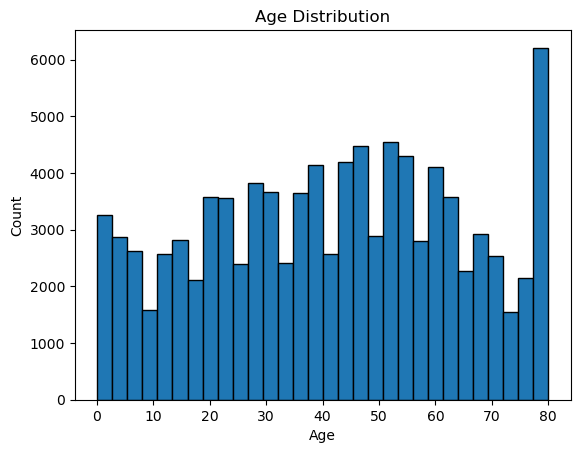

In [12]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**2.2.2 Diagrama de barras para Gender**

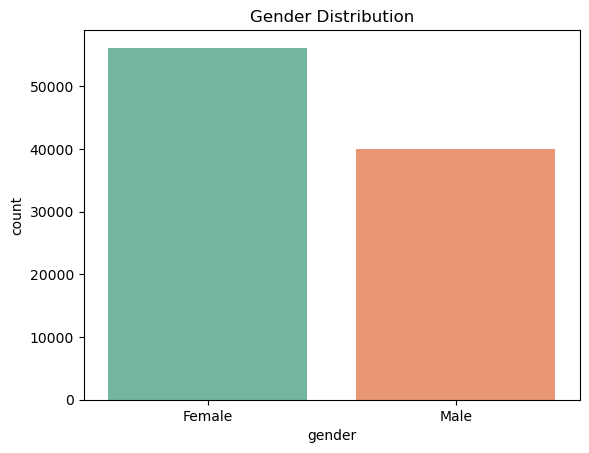

In [13]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

**2.2.3 Grafico de distribucion para BMI**

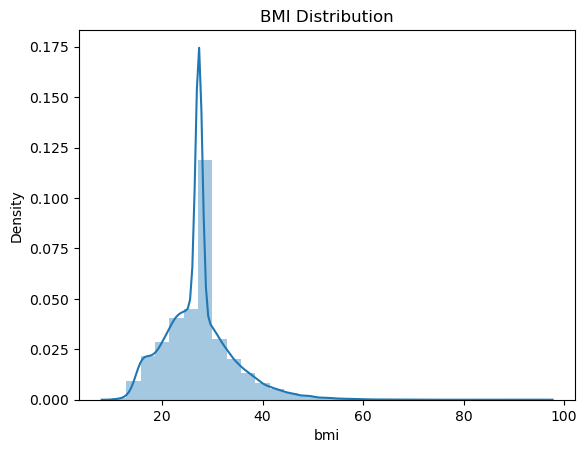

In [14]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

**2.2.4 Graficos para variables binarias**

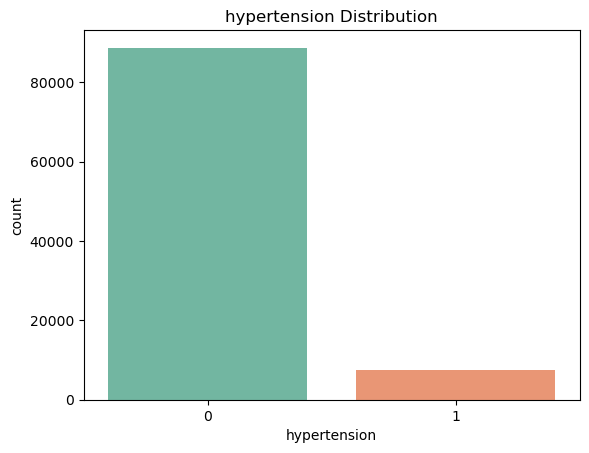

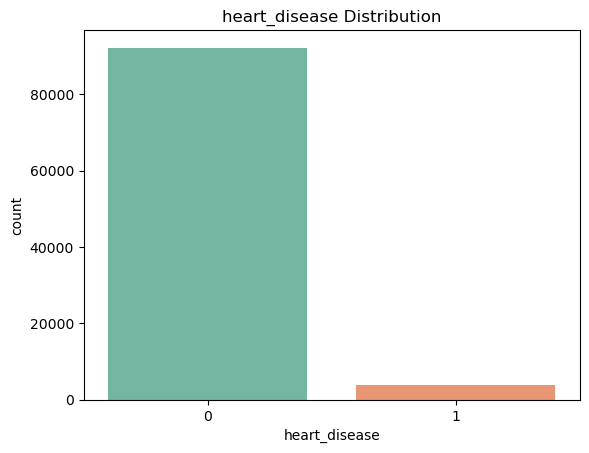

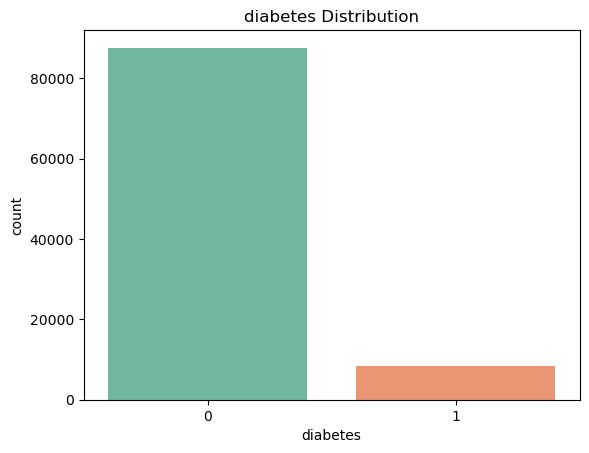

In [15]:
for col in ['hypertension','heart_disease','diabetes']:
  sns.countplot(x=col, data=df, palette='Set2')
  plt.title(f'{col} Distribution')
  plt.show()

**2.2.5 Grafico para smoking history**

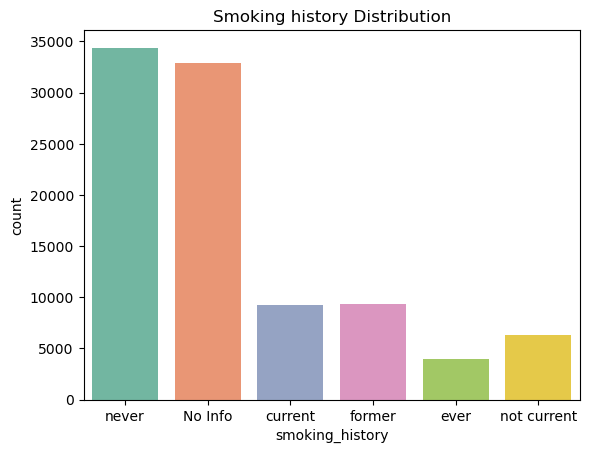

In [16]:
sns.countplot(x='smoking_history', data=df, palette='Set2')
plt.title('Smoking history Distribution')
plt.show()

## **2.3 Análisis Bivariado**

**2.3.1 Diagrama de caja BMI vs Diabetes**

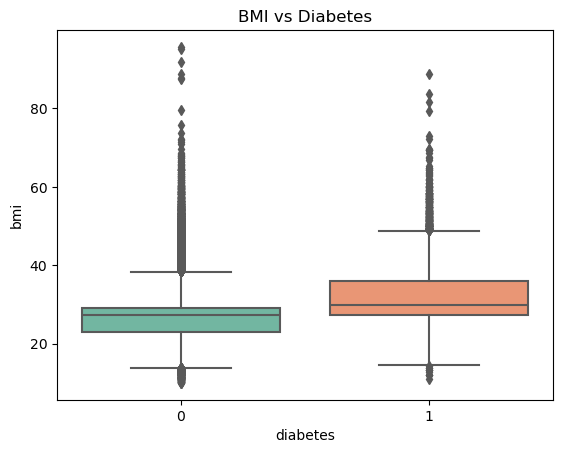

In [17]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette='Set2')
plt.title('BMI vs Diabetes')
plt.show()

**2.3.2 Diagrama de caja Age vs Diabetes**

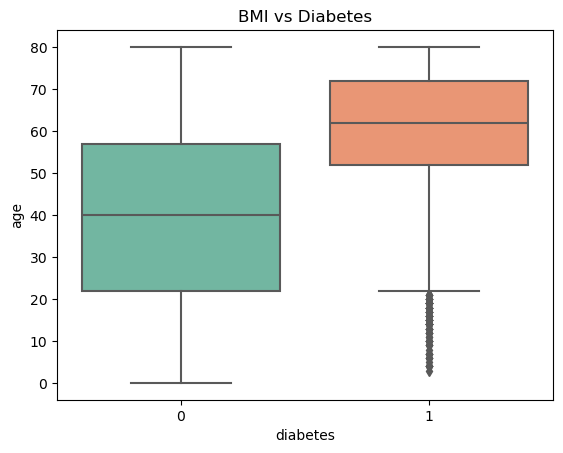

In [18]:
sns.boxplot(x='diabetes', y='age', data=df, palette='Set2')
plt.title('BMI vs Diabetes')
plt.show()

**2.3.3 Grafico para gender vs diabetes**

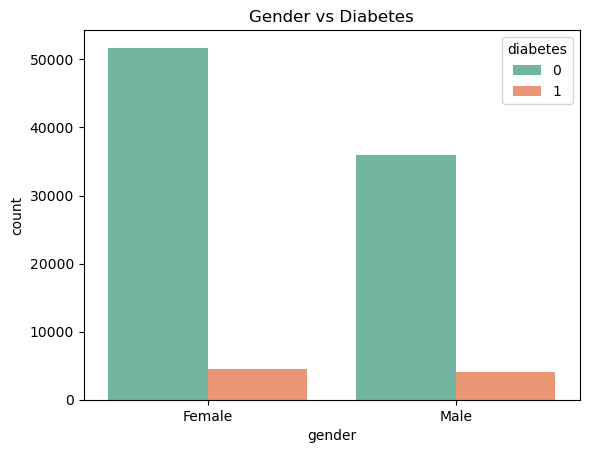

In [19]:
df['diabetes'] = df['diabetes'].astype(str)

sns.countplot(x='gender', hue='diabetes', data=df, palette='Set2')
plt.title('Gender vs Diabetes')
plt.show()

**2.3.4 Diagrama de caja HbA1c vs Diabetes**

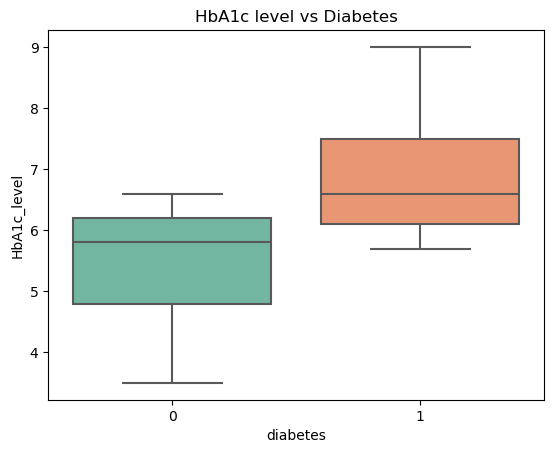

In [20]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, palette='Set2')
plt.title('HbA1c level vs Diabetes')
plt.show()

**2.3.5 Diagrama de caja blood glucose level vs Diabetes**

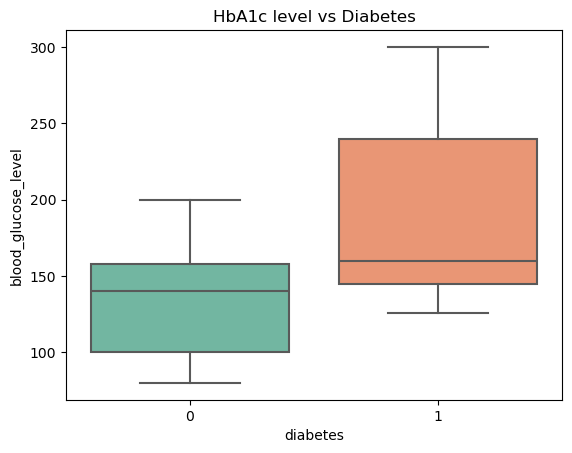

In [21]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, palette='Set2')
plt.title('HbA1c level vs Diabetes')
plt.show()

**2.3.6 Gráfico de pares para variables numéricas**

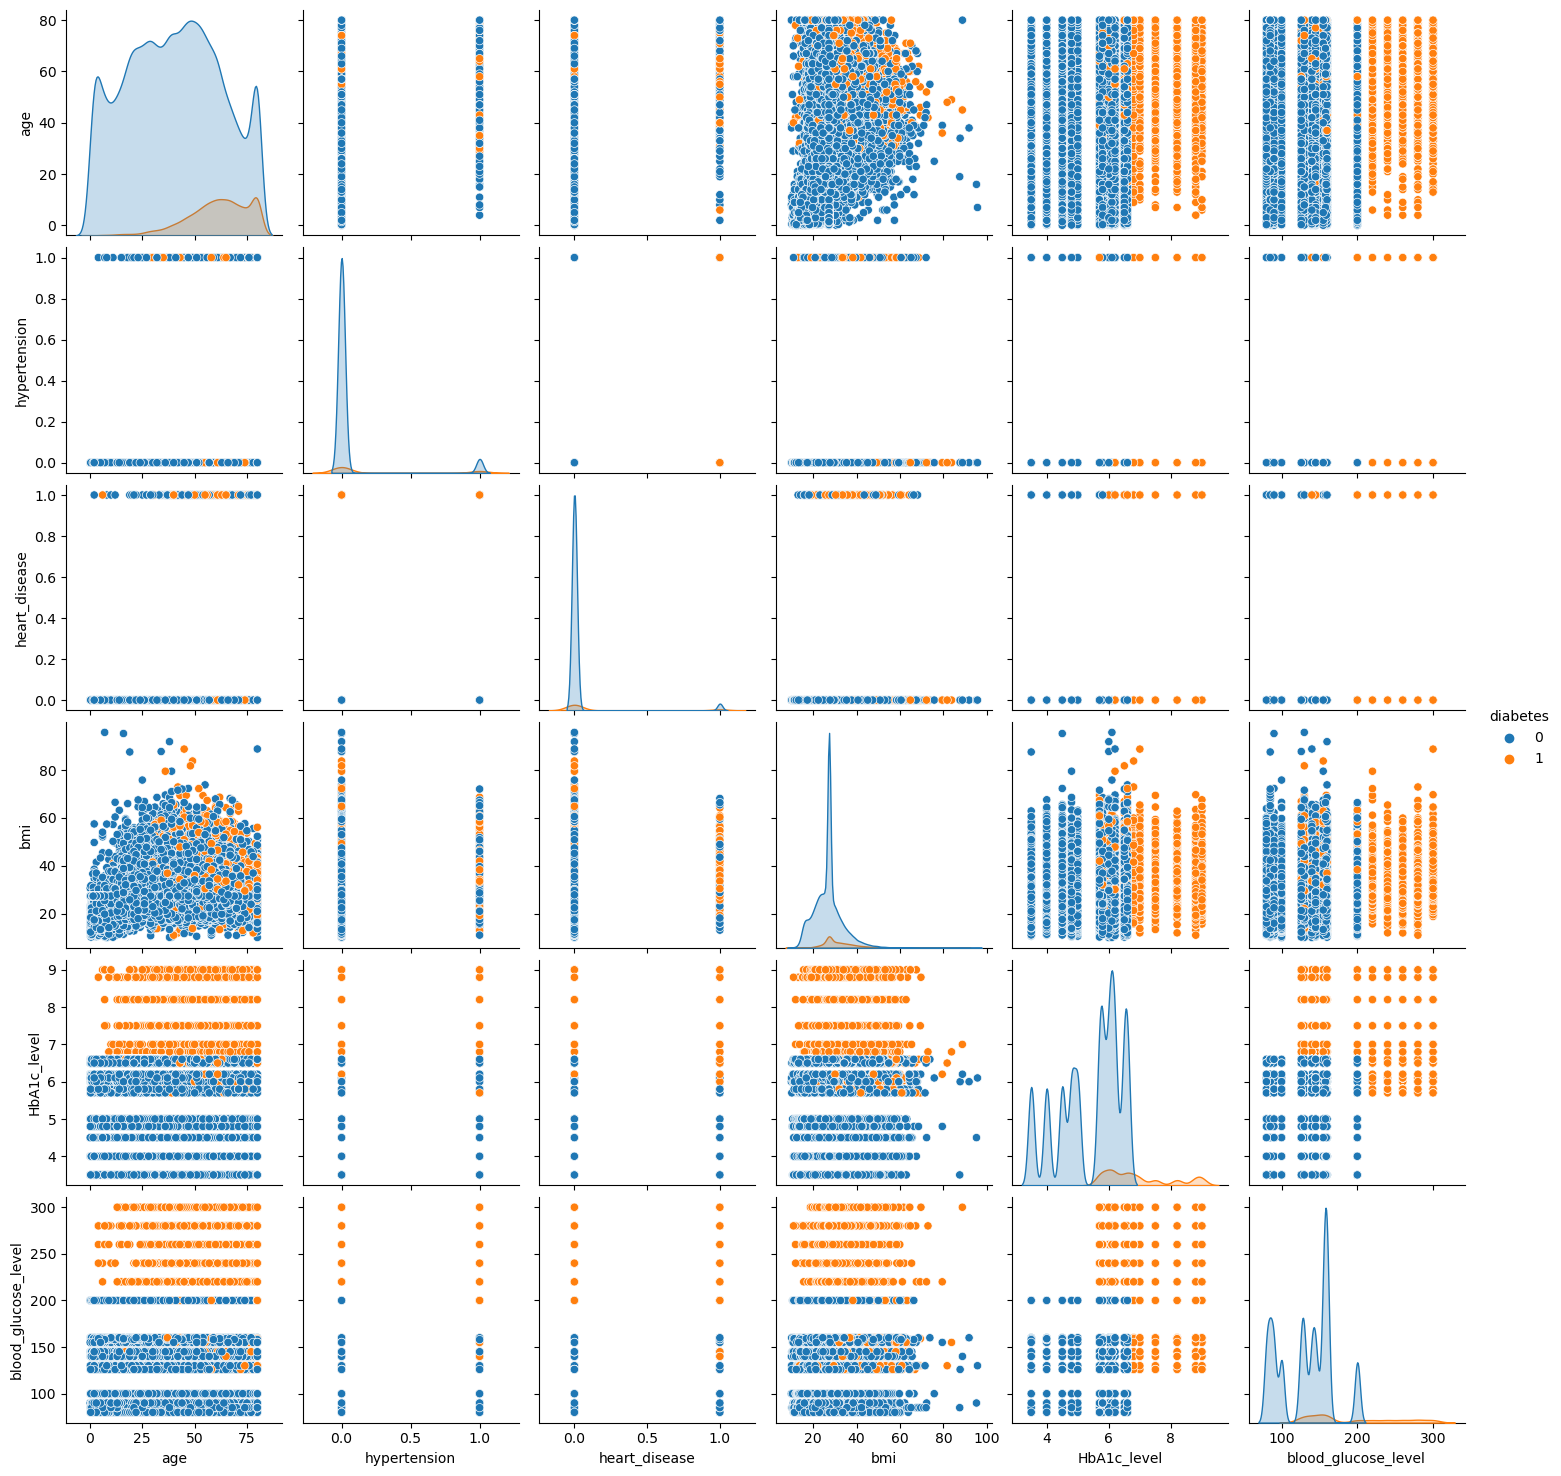

In [22]:
sns.pairplot(df, hue='diabetes')
plt.show()

## **2.4 Análisis Multivariado**

**2.4.1 Gráfico de dispersión para Age vs BMI diferenciado por clasificación de diabetes**

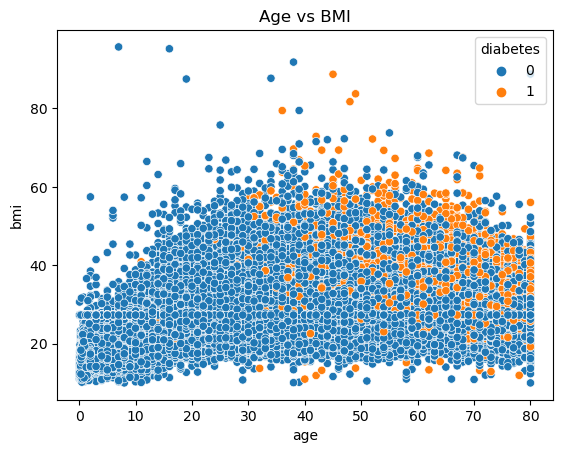

In [23]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

**2.4.2 Gráfico de violin para BMI vs Diabetes diferenciado por género**

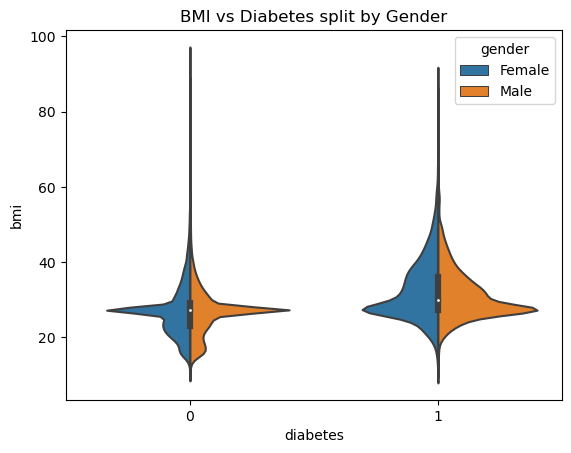

In [24]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

**2.4.3 Relación entre BMI, diabetes diferenciado por gender**

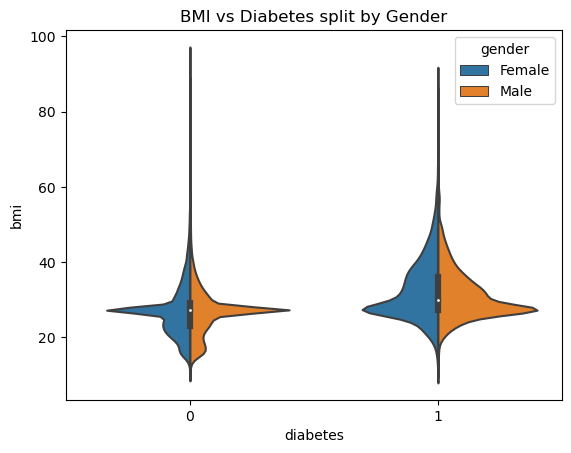

In [25]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

**2.4.4 Relación entre BMI, diabetes y gender**

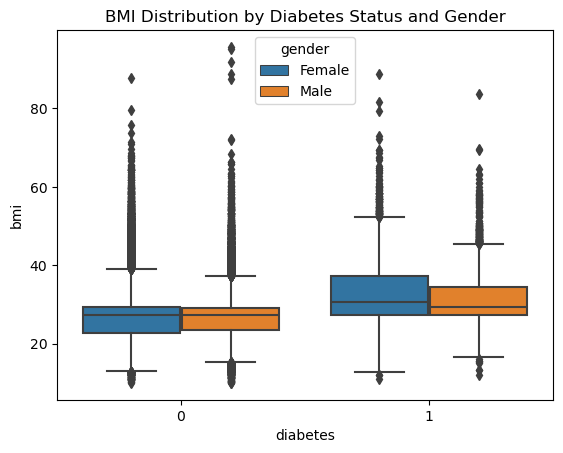

In [26]:
sns.boxplot(x='diabetes', y='bmi', hue = 'gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

**2.4.5 Relación entre Edad, diabetes y gender**

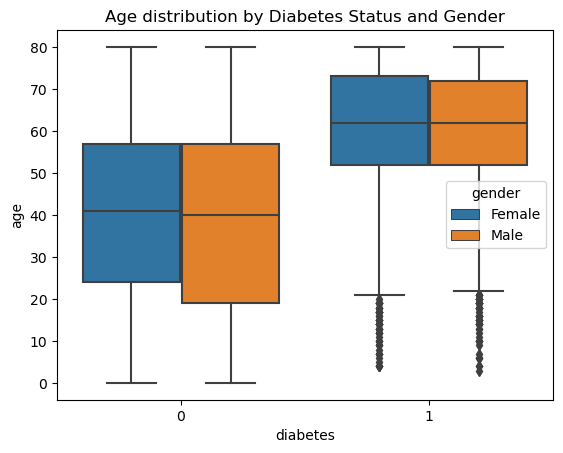

In [27]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age distribution by Diabetes Status and Gender')
plt.show()

# **3. Preparacion de datos**

In [28]:
#Definimos una funcion para realizar "mapping" de las variables existentes a nuevas

def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'


#Aplicamos la funcion "recategorizate_smoking" a la columna "smoking_history"

df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

#Chequeamos los valores resultantes

print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [29]:
df['diabetes'] = df['diabetes'].astype(int)
data = df.copy()

## **3.1 Realizamos Encoder**

In [30]:
def perform_one_hot_encoding(df, column_name):
  #Realizamos el encoding sobre columnas especificas
  dummies = pd.get_dummies(df[column_name], prefix=column_name)

  #Eliminamos las columnas originales y acomplamos las nuevas
  df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

  return df

#Aplicamos la funcion sobre la variable "gender"

data = perform_one_hot_encoding(data, 'gender')

#Aplicamos la funcion sobre la variable "smoking_history"

data = perform_one_hot_encoding(data, 'smoking_history')

## **3.2 Matriz de Correlación**

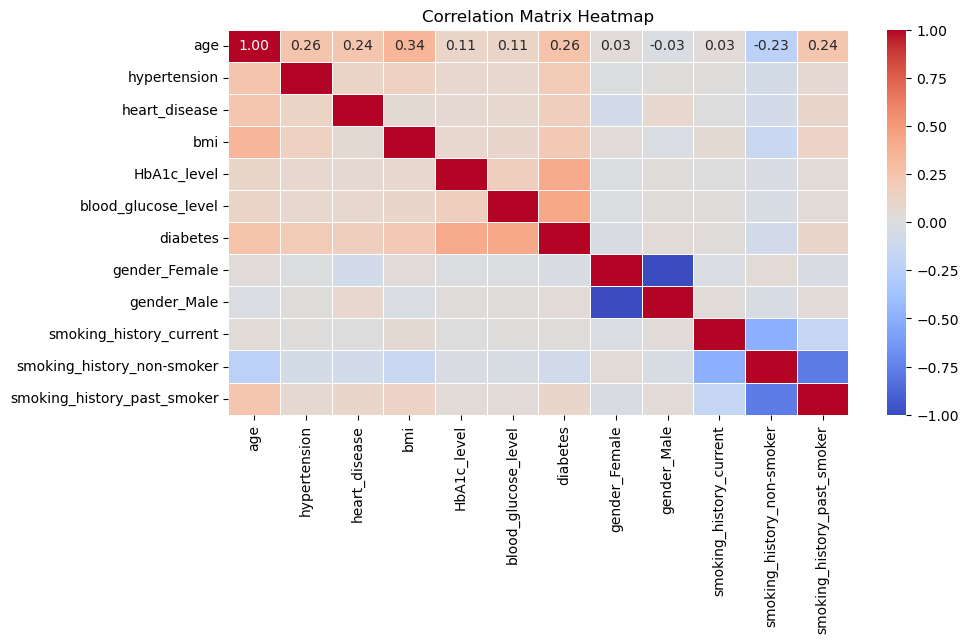

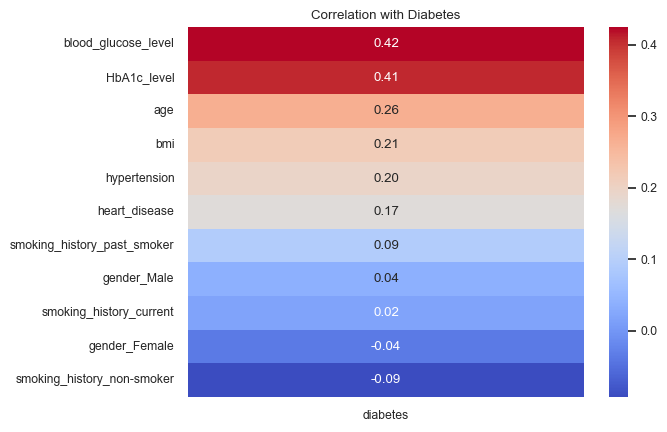

In [31]:
#Realizamos la matriz de correlación

correlation_matrix = data.corr()

#Grafico I

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Grafico II

corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

#Ordenamos la correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# **4. Análisis de Predicción**

## **4.1 Desequilibrio de clases**

A partir del Análisis Exploratorio de Datos (EDA), **se observa que el conjunto de datos está desbalanceado (con un 9% de casos positivos para la diabetes y un 91% de casos negativos)**, por lo que es esencial balancear los datos para asegurar que el modelo no se sesgue hacia la clase mayoritaria. Con este fin, se utiliza la Técnica de Sobremuestreo Sintético de la Clase Minoritaria (SMOTE, por sus siglas en inglés), la cual genera muestras sintéticas para la clase minoritaria.

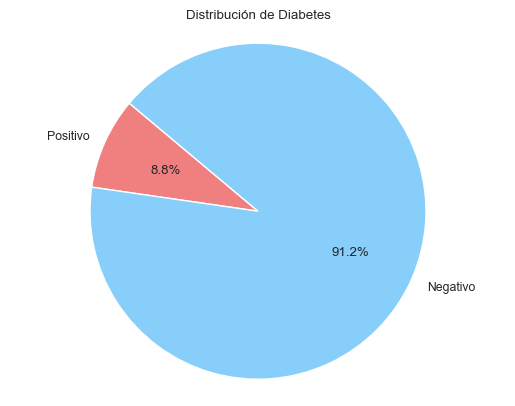

In [32]:
#Mostramos la distribucion de casos para confirmar lo previamente dicho.

# Porcentajes de casos de diabetes
positivos_diabetes = (df['diabetes'] == 1).sum()
negativos_diabetes = (df['diabetes'] == 0).sum()
porcentajes = [positivos_diabetes, negativos_diabetes]

# Etiquetas para los porcentajes
etiquetas = ['Positivo', 'Negativo']

# Colores para las porciones
colores = ['lightcoral', 'lightskyblue']

# Crear el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)

# Título del gráfico
plt.title('Distribución de Diabetes')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

### **Técnicas de Remuestreo**

* **SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE es una técnica de sobremuestreo utilizada para abordar el desequilibrio de clases en conjuntos de datos, específicamente cuando la clase minoritaria está subrepresentada. Lo que hace SMOTE es generar muestras sintéticas para la clase minoritaria mediante la interpolación de instancias existentes en el espacio de características. Básicamente, SMOTE crea nuevas instancias sintéticas de la clase minoritaria mediante la combinación de ejemplos cercanos de la misma clase.

* **RandomUnderSampler:**

RandomUnderSampler es una técnica de submuestreo que se utiliza para equilibrar clases al reducir aleatoriamente el número de muestras de la clase mayoritaria. En lugar de crear muestras sintéticas como SMOTE, RandomUnderSampler selecciona aleatoriamente un subconjunto de muestras de la clase mayoritaria para igualar el tamaño de la clase minoritaria.

In [33]:
#Definimos las funciones para el remuestreo

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

## **4.2 Preprocesamiento: Escalador**

El preprocesamiento es un paso crucial antes de entrenar el modelo. En este caso, las características numéricas se estandarizan (se elimina la media y se escalan a varianza unitaria), y las características categóricas se codifican en one-hot encoding. La estandarización no es necesaria para todos los modelos, pero generalmente es una buena práctica. La codificación one-hot encoding es necesaria para que las variables categóricas sean comprendidas correctamente por el modelo de aprendizaje automático.

El StandardScaler en sklearn se basa en la suposición de que los datos, Y, siguen una distribución que podría no ser necesariamente gaussiana (normal), pero aún así los transformamos de tal manera que su distribución tendrá un valor medio de 0 y una desviación estándar de 1.

In [34]:
#Definimos el preprocesador

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

#Separamos los datos en objetivo y las variables a utilizar

X = df.drop('diabetes', axis=1)
y = df['diabetes']

## **4.3 Pipeline**

Las pipelines de imblearn, son herramientas poderosas utilizadas para automatizar y estructurar flujos de trabajo en el procesamiento de datos desbalanceados en problemas de aprendizaje automático.

**Algunos de los principales beneficios son:**

1. **Preprocesamiento y remuestreo integrados:**
Las pipelines de imblearn permiten combinar pasos de preprocesamiento de datos, como escalado, selección de características, con técnicas de remuestreo específicas para abordar el desequilibrio de clases, como SMOTE o RandomUnderSampler.

1. **Facilitan la replicación y validación cruzada:**
Al encapsular todos los pasos de preprocesamiento, remuestreo y modelado en una sola entidad, las pipelines facilitan la replicación de experimentos y la aplicación de validación cruzada de manera más eficiente.

1. **Evitan fugas de datos:**
Al tener todos los pasos de procesamiento dentro de la pipeline, se reduce el riesgo de fugas de datos, ya que las transformaciones se aplican de manera consistente a los datos en cada iteración.

In [35]:
#Creamos una Pipeline que preprocese los datos y luego entrene el calificador

clf = imbPipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('over', over),
                        ('under', under),
                        ('classifier', RandomForestClassifier())
                        ])

## **4.4 Construcción del modelo y Ajuste de hiperparámetros**

Se construye una Pipeline que primero aplica los pasos de preprocesamiento y luego entrena un modelo en los datos. Utilizamos un modelo de RandomForestClassifier, que es un algoritmo popular y potente para tareas de clasificación.

Los hiperparámetros del modelo se ajustan utilizando **GridSearchCV**, que realiza una búsqueda exhaustiva sobre los valores de parámetro especificados para el estimador. El mejor modelo en rendimiento se selecciona basado en la validación cruzada.

In [36]:
#Definimos los Hiperparámetros y los valores a testear.

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [37]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}


### **Interpretacion de los resultados**

Los resultados muestran los mejores parámetros para nuestro modelo de Random Forest que se encontraron durante el proceso de ajuste de hiperparámetros:


1.   **max_depth de 10:** Esto indica que la profundidad máxima de los árboles en el bosque es de 10 niveles. Restringir la profundidad del árbol ayuda a reducir el sobreajuste. Parece que un árbol de complejidad media funciona mejor para nuestros datos. Demasiada complejidad (un árbol más profundo) puede capturar ruido, y muy poca (un árbol más superficial) puede no capturar la estructura subyacente de los datos.

2. **min_samples_leaf de 2:** Esto significa que cada hoja (el nodo final de un árbol de decisión, donde se realizan las predicciones) debe contener al menos dos muestras. Este parámetro, al igual que max_depth, es una forma de controlar el sobreajuste. Al requerir al menos dos muestras para hacer una predicción, el modelo evita el ajuste a valores atípicos o ruido en los datos de entrenamiento.

3. **min_samples_split de 2:** Esto nos dice que un nodo debe contener al menos dos muestras para poder dividirse (para crear dos nodos hijos). Similar al parámetro min_samples_leaf, esto puede ayudar a controlar el sobreajuste.  

4.  **n_estimators de 50:** Este es el número de árboles de decisión en el bosque. El algoritmo de Random Forest funciona promediando las predicciones de muchos árboles de decisión para hacer una predicción final, lo que ayuda a reducir el sobreajuste y la varianza. En este caso, parece que tener 50 árboles en el bosque nos brinda el mejor rendimiento.

Estos parámetros son el resultado del proceso de ajuste de hiperparámetros, y
nos brindan información sobre la estructura de los datos y la complejidad del modelo que mejor captura esa estructura. La profundidad del árbol moderadamente restringida y los requisitos para el número de muestras en cada nodo sugieren un modelo lo suficientemente complejo como para capturar los patrones importantes en los datos, pero no tan complejo como para sobreajustarse al ruido o a los valores atípicos. Este equilibrio es crucial para crear un modelo que generalice bien a nuevos datos.

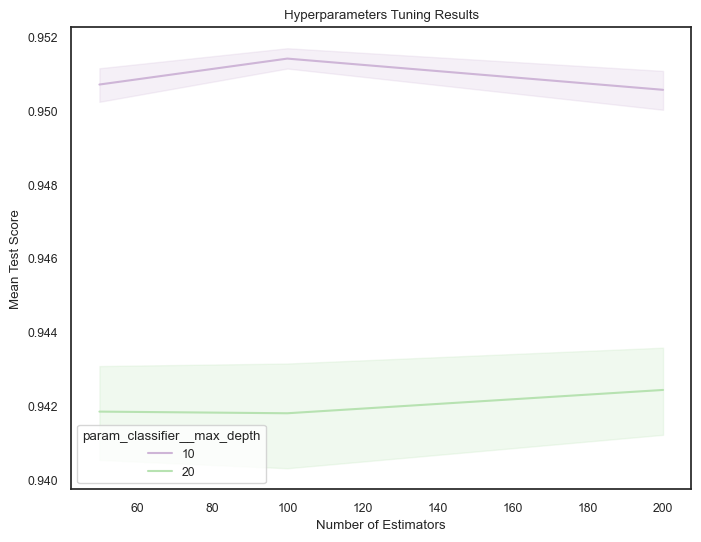

In [38]:
#Transformamos los resultados del GridSearchCV a un Dataframe y los graficamos.

resulst_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8,6))
sns.lineplot(data=resulst_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='PRGn')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

## **4.5 Matriz de Confusión**

El modelo entrenado se evalúa en el conjunto de prueba. La **matriz de confusión** se utiliza para visualizar el rendimiento del modelo. Muestra las predicciones de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos del modelo.

**Precision:**
La precisión es una medida de cuántas de las predicciones verdaderamente positivas fueron realmente correctas. Se define como el número de verdaderos positivos (TP) dividido por la suma de verdaderos positivos (TP) y falsos positivos (FP).

**Recall:**
La recuperación (o Sensibilidad) es una medida de cuántos de los casos positivos reales fueron identificados correctamente. Se define como el número de verdaderos positivos (TP) dividido por la suma de verdaderos positivos (TP) y falsos negativos (FN).

**F1-Score:**
La puntuación F1 es la media armónica de Precisión y Recuperación e intenta encontrar el equilibrio entre precisión y recuperación. Se define como 2 veces el producto de precisión y recuperación dividido por la suma de precisión y recuperación.

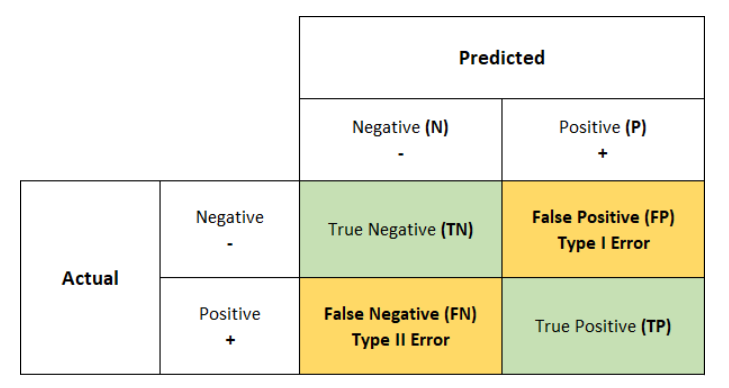


**En todas estas fórmulas:** Los Verdaderos Positivos (TP) son los casos en los que predijimos sí (diabetes presente), y el resultado real también fue sí. Los Verdaderos Negativos (TN) son los casos en los que predijimos no, y el resultado real también fue no. Los Falsos Positivos (FP) son los casos en los que predijimos sí, pero el resultado real fue no. Los Falsos Negativos (FN) son los casos en los que predijimos no, pero el resultado real fue sí.

Model Accuracy:  0.9496515135753667
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



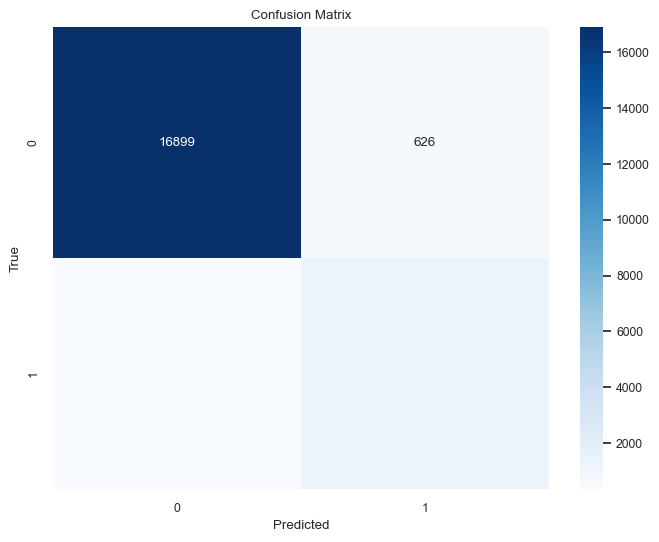

In [39]:
#Realizamos las predicciones en el conjunto de prueba utilizando el mejor modelo encontrado

y_pred = grid_search.predict(X_test)

#Evaluamos el modelo
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#Graficamos la matriz de confusión

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **4.6 Interpretación de los resultados**

Interpretación de los resultados:

Nuestro modelo de **Random Forest entrenado logró una precisión de alrededor del 95%.** Esto indica que el modelo clasificó correctamente alrededor del 95% de todos los casos en el conjunto de prueba.

Al profundizar en las métricas de clasificación, desglosemos el rendimiento para cada clase (0 y 1) por separado:

**A | Clase 0 (No diabetes):**
El modelo tiene una alta precisión (0.98) para la clase 0, lo que significa que entre todas las instancias donde el modelo predijo no diabetes, el 98% fueron realmente no diabetes.
El recall para la clase 0 también es alto (0.96). Esto significa que nuestro modelo identificó correctamente el 96% de todos los casos reales de no diabetes en el conjunto de datos.

**B | Clase 1 (Diabetes):**
La precisión para la clase 1 es más baja, alrededor de (0.65), lo que indica que cuando el modelo predijo diabetes, fue correcto alrededor del 65% del tiempo.
Sin embargo, el recall es razonablemente alto, alrededor de (0.80). Esto significa que nuestro modelo pudo capturar alrededor del 80% de todos los casos reales de diabetes.
La puntuación F1, una media armónica de precisión y recall, es alrededor de 0.97 para la clase 0 y alrededor de 0.72 para la clase 1. La puntuación F1 ponderada promedio es alrededor de 0.94, en línea con la precisión general.

Esta discrepancia en el rendimiento entre las clases probablemente se deba al desequilibrio en el conjunto de datos original. La Clase 0 (No diabetes) es la clase mayoritaria y tiene más ejemplos para que el modelo aprenda.

Sin embargo, el mayor recall para la clase 1 (Diabetes) es prometedor. Este es un aspecto esencial para un modelo de atención médica, ya que perder casos positivos reales (falsos negativos) puede tener serias implicaciones.

*📝 En resumen, aunque nuestro modelo tiene un buen rendimiento en general, destaca especialmente con la clase mayoritaria (no diabetes). Para mejorar el rendimiento en la clase minoritaria (diabetes), podemos abordar aún más el desequilibrio de clases o ajustar los parámetros del modelo. A pesar de estas áreas de mejora, la capacidad del modelo para identificar con precisión un alto porcentaje de casos de diabetes reales es alentadora en esta etapa temprana del desarrollo del modelo. Se espera que iteraciones y refinamientos posteriores mejoren la precisión en las predicciones de diabetes sin comprometer el recall.*

# **5. Importancia de las Caracteristicas**

Finalmente, se calcula la importancia de cada característica. Esta es la disminución total en la impureza del nodo (ponderada por la probabilidad de alcanzar ese nodo, que se aproxima mediante la proporción de muestras que alcanzan ese nodo) promediada sobre todos los árboles del conjunto. La importancia de las características proporciona información sobre qué características son más útiles para hacer predicciones. Las características se clasifican según su importancia y se visualizan utilizando un gráfico de barras.

                        Feature  Importance
2                   HbA1c_level        0.43
3           blood_glucose_level        0.34
0                           age        0.11
1                           BMI        0.06
4                  hypertension        0.03
5                 heart_disease        0.02
9    smoking_history_non-smoker        0.00
10  smoking_history_past_smoker        0.00
6                 gender_Female        0.00
7                   gender_Male        0.00
8       smoking_history_current        0.00


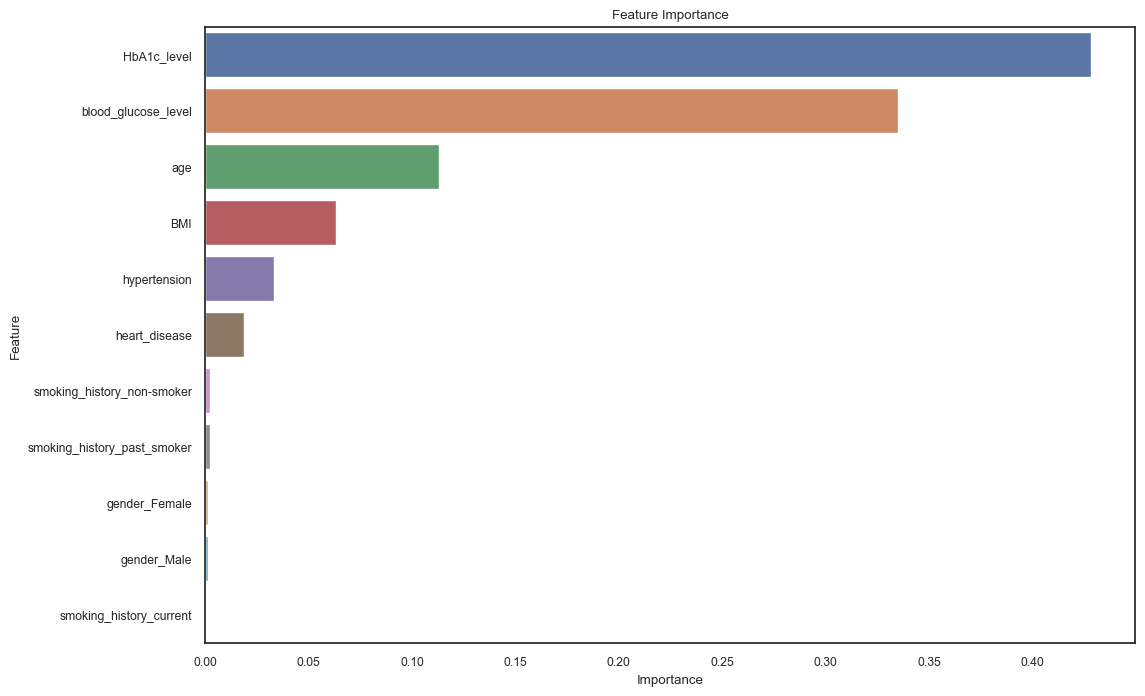

In [40]:
#Le colocamos los nombres a las caracteristicas

onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender','smoking_history']))

#Le colocamos los nombres a las caracteristicas numericas

feature_names = ['age','BMI','HbA1c_level','blood_glucose_level','hypertension','heart_disease'] + onehot_columns

# Vemos la importancia de caracteristicas
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Creamos un DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#Generamos la importancia de las caracteristicas

importance_df = importance_df.sort_values('Importance', ascending=False)

#Mostramos la importancia de las caracteristicas
print(importance_df)

#Realizamos grafico de barra
plt.figure(figsize=(12,8))
sns.barplot(x='Importance',y='Feature', data=importance_df, palette='deep')
plt.title('Feature Importance')
plt.show()

## **Interpretación de los resultados**

Los resultados de la importancia de las características proporcionan información sobre qué características son más influyentes en la predicción de la diabetes utilizando nuestro modelo de **Random Forest**. La importancia de una característica se calcula según cuánto reducen la impureza los nodos del árbol que utilizan esa característica en todos los árboles del bosque.

Aquí están los hallazgos clave de los resultados de la importancia de las características:

- El nivel de HbA1c es la característica más importante con una importancia de 0.44. La HbA1c es una medida de los niveles promedio de glucosa en sangre durante los últimos 2 a 3 meses, por lo que no es sorprendente que sea un predictor significativo de la diabetes.

- El nivel de glucosa en sangre es la segunda característica más importante con una importancia de 0.32. Esto coincide con el conocimiento médico, ya que los niveles de glucosa en sangre se utilizan directamente para diagnosticar la diabetes.

- La edad es la tercera característica más importante con una importancia de 0.14. Es bien sabido que el riesgo de diabetes tipo 2 aumenta a medida que se envejece.

- El IMC ocupa el cuarto lugar en importancia con un valor de 0.06. El Índice de Masa Corporal es un factor de riesgo clave para la diabetes, y su papel está bien documentado en la literatura médica.

- Otras características como la hipertensión y la enfermedad cardíaca muestran cierta importancia (0.02 y 0.01, respectivamente), lo que indica que estas condiciones de salud podrían tener cierta relevancia en la predicción de la diabetes, aunque no tan significativa como los cuatro factores principales.

- El historial de tabaquismo *('smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_current') y el género ('gender_Female', 'gender_Male')* muestran tener una importancia mínima o nula en nuestro modelo. Esto podría deberse a una serie de razones, incluido que estos factores pueden no ser tan influyentes en el desarrollo de la diabetes o podría ser el resultado de cómo se recopilaron o estructuraron los datos.


⚠️ Sin embargo, estos resultados deben interpretarse con precaución. La importancia de una característica en un modelo de **Random Forest** no necesariamente implica una relación causal, y es específica de este modelo y este conjunto de datos. Otros modelos podrían encontrar resultados diferentes. Además, una baja importancia no significa necesariamente que la característica sea poco importante para predecir la diabetes en general, puede significar simplemente que la característica no es útil en presencia de otras características. Se debe considerar un análisis exhaustivo de las características para comprender mejor la contribución de cada una en la predicción.


**En general, nuestros hallazgos están en línea con el conocimiento médico y la literatura sobre los factores de riesgo para la diabetes. Las características más importantes están relacionadas con mediciones de sangre, seguidas de la edad y el IMC, con menos importancia para condiciones comórbidas como la hipertensión y la enfermedad cardíaca.**

# **6. Resumen**

El análisis empleó un clasificador de Random Forest para predecir la diabetes basado en diversos indicadores de salud y factores de estilo de vida. El modelo fue entrenado y evaluado en un conjunto de datos de 100,000 registros, y se realizó un ajuste de hiperparámetros para optimizar el rendimiento del modelo.

El modelo logró una precisión de aproximadamente el 95.1%, con una precisión de 0.98 para la clase 0 (no diabéticos) y 0.69 para la clase 1 (diabéticos). También pudo recordar correctamente el 96% de los casos no diabéticos y el 81% de los casos diabéticos. La precisión relativamente alta y el rendimiento equilibrado en ambas clases indican que el modelo está bien ajustado y es robusto.

El análisis de importancia de características destacó el nivel de HbA1c y el nivel de glucosa en sangre como los factores más críticos en la predicción de la diabetes. La edad y el IMC también mostraron una importancia significativa. Sin embargo, algunas características, como el historial de tabaquismo y el género, tuvieron un impacto mínimo o nulo en las predicciones del modelo.

## **Sugerencias**

1. Recopilación de Datos: Si es posible realizar más recopilación de datos, podríamos aspirar a obtener más información sobre factores de estilo de vida y otros posibles factores de riesgo de la diabetes que no estén cubiertos en este conjunto de datos. Por ejemplo, información detallada sobre la dieta, nivel de actividad física, antecedentes familiares de diabetes y una información más precisa sobre enfermedades cardíacas o hipertensión podrían mejorar las capacidades predictivas del modelo.

2. Exploración del Modelo: Aunque el modelo de Random Forest ha tenido un buen rendimiento, podría valer la pena explorar otros modelos de aprendizaje automático. Por ejemplo, modelos de aumento de gradiente como XGBoost o LightGBM podrían ofrecer un rendimiento mejorado.

3. Ingeniería de Características: Una ingeniería de características más sofisticada podría potencialmente mejorar el rendimiento del modelo. Características de interacción, características polinomiales u otras transformaciones podrían valer la pena explorar.

4. Interpretación del Modelo: Para comprender mejor la influencia de cada característica, podríamos utilizar herramientas de interpretación como SHAP (SHapley Additive exPlanations) o importancia de características por permutación, que pueden ofrecer una vista más matizada de la importancia de las características que la importancia de características tradicional basada en la reducción de la impureza.

5. Abordar el Desequilibrio de Clases: A pesar de utilizar SMOTE para equilibrar las clases, todavía hay margen para mejorar las métricas de rendimiento para la clase minoritaria. Se podrían explorar otros métodos de sobre-muestreo, métodos de submuestreo o métodos de aprendizaje sensible al costo para mejorar la recall y la precisión para la clase minoritaria.